# Music Box Churn Prediction and Recommendation using Spark

# Using Scikit-learn to train model

# Goal:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data

In [2]:
df = pd.read_csv('data/model_final.csv')

#### Inspect dataset

In [3]:
df.head()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,...,total_play_time_1,total_play_time_3,total_play_time_7,total_play_time_14,total_play_time_30,eighty_1,eighty_3,eighty_7,eighty_14,eighty_30
0,11596711,0,0,15,34,69,105,0,2,3,...,0,1549,3582,4164,9205,0,7,13,15,35
1,165827786,1,0,0,0,0,116,0,0,0,...,0,0,0,0,3601,0,0,0,0,12
2,167328646,1,0,0,0,0,11,0,0,0,...,0,0,0,0,3231,0,0,0,0,9
3,167569919,1,0,0,0,0,2,0,0,0,...,0,0,0,0,1430,0,0,0,0,0
4,167570402,0,0,12,19,44,91,0,1,2,...,0,1793,3630,7484,17755,0,4,10,23,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50240 entries, 0 to 50239
Data columns (total 31 columns):
uid                       50240 non-null int64
label                     50240 non-null int64
freq_P_last_1             50240 non-null int64
freq_P_last_3             50240 non-null int64
freq_P_last_7             50240 non-null int64
freq_P_last_14            50240 non-null int64
freq_P_last_30            50240 non-null int64
freq_S_last_1             50240 non-null int64
freq_S_last_3             50240 non-null int64
freq_S_last_7             50240 non-null int64
freq_S_last_14            50240 non-null int64
freq_S_last_30            50240 non-null int64
freq_D_last_1             50240 non-null int64
freq_D_last_3             50240 non-null int64
freq_D_last_7             50240 non-null int64
freq_D_last_14            50240 non-null int64
freq_D_last_30            50240 non-null int64
device_type               50240 non-null int64
days_from_last_P_evnet    50240 non-null int6

In [5]:
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,...,total_play_time_1,total_play_time_3,total_play_time_7,total_play_time_14,total_play_time_30,eighty_1,eighty_3,eighty_7,eighty_14,eighty_30
count,5.024000e+04,50240.000000,50240.0,50240.000000,50240.000000,50240.000000,50240.000000,50240.0,50240.000000,50240.000000,...,50240.0,5.024000e+04,5.024000e+04,5.024000e+04,5.024000e+04,50240.0,50240.000000,50240.000000,50240.000000,50240.000000
mean,1.672968e+08,0.567277,0.0,6.442357,20.983439,53.463316,144.458599,0.0,0.239510,1.191939,...,0.0,2.884146e+03,1.039478e+04,3.596584e+04,1.667039e+05,0.0,3.253025,10.570322,26.916819,69.505971
std,1.068979e+07,0.495458,0.0,26.308133,64.506404,137.909171,286.022094,0.0,1.586038,5.641400,...,0.0,9.195269e+04,3.116084e+05,7.252086e+05,2.356087e+06,0.0,13.809694,36.487557,80.149031,164.557612
min,2.975400e+05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.679879e+08,0.000000,0.0,0.000000,0.000000,0.000000,10.000000,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.990000e+02,0.0,0.000000,0.000000,0.000000,2.000000
50%,1.683898e+08,1.000000,0.0,0.000000,0.000000,1.000000,41.000000,0.0,0.000000,0.000000,...,0.0,0.000000e+00,0.000000e+00,2.150000e+01,4.357500e+03,0.0,0.000000,0.000000,0.000000,13.000000
75%,1.687152e+08,1.000000,0.0,0.000000,10.000000,41.000000,151.000000,0.0,0.000000,0.000000,...,0.0,0.000000e+00,1.072000e+03,4.872000e+03,2.040200e+04,0.0,0.000000,3.000000,15.000000,63.000000
max,1.692623e+08,1.000000,0.0,1140.000000,1745.000000,2822.000000,4679.000000,0.0,115.000000,398.000000,...,0.0,9.439951e+06,3.893971e+07,6.550098e+07,2.204509e+08,0.0,593.000000,846.000000,1766.000000,4674.000000


In [6]:
df.columns

Index(['uid', 'label', 'freq_P_last_1', 'freq_P_last_3', 'freq_P_last_7',
       'freq_P_last_14', 'freq_P_last_30', 'freq_S_last_1', 'freq_S_last_3',
       'freq_S_last_7', 'freq_S_last_14', 'freq_S_last_30', 'freq_D_last_1',
       'freq_D_last_3', 'freq_D_last_7', 'freq_D_last_14', 'freq_D_last_30',
       'device_type', 'days_from_last_P_evnet', 'days_from_last_S_evnet',
       'days_from_last_D_evnet', 'total_play_time_1', 'total_play_time_3',
       'total_play_time_7', 'total_play_time_14', 'total_play_time_30',
       'eighty_1', 'eighty_3', 'eighty_7', 'eighty_14', 'eighty_30'],
      dtype='object')

#### one-hot for `device_type`

In [7]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

## 2. Define features and targets

In [8]:
selected_features = list(df.columns.values)

In [9]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'days_from_last_P_evnet',
 'days_from_last_S_evnet',
 'days_from_last_D_evnet',
 'total_play_time_1',
 'total_play_time_3',
 'total_play_time_7',
 'total_play_time_14',
 'total_play_time_30',
 'eighty_1',
 'eighty_3',
 'eighty_7',
 'eighty_14',
 'eighty_30',
 'device_type_1',
 'device_type_2']

In [10]:
X = df[selected_features].values
y = df['label'].values

In [11]:
X.shape

(50240, 30)

In [12]:
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

## 3. Build models

#### Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40192, 30), (10048, 30), (40192,), (10048,))

#### Define metric

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                           accuracy_score(y_train, p_train_pred > threshold),
                           precision_score(y_train, p_train_pred > threshold),
                           recall_score(y_train, p_train_pred > threshold),
                           f1_score(y_train, p_train_pred > threshold)]
    
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                          accuracy_score(y_test, p_test_pred > threshold),
                          precision_score(y_test, p_test_pred > threshold),
                          recall_score(y_test, p_test_pred > threshold),
                          f1_score(y_test, p_test_pred > threshold)]
    
    all_metrics = pd.DataFrame({'metrics': metric_names,
                                'train': metric_values_train,
                                'test': metric_values_test},
                                columns=['metrics', 'train', 'test'])

    all_metrics.set_index('metrics')
    print(all_metrics)

#### Define ploting function

In [16]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)
    
    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    
    lw = 2
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='green', linewidth=lw, label = 'ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange', linewidth=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', linewidth=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

In [17]:
def plot_feature_importance(model):
    df_feature_importance = pd.DataFrame()
    df_feature_importance['feature'] = selected_features
    df_feature_importance['importance'] = model.feature_importances_
    df_feature_importance.sort_values('importance', inplace=True)
    
    ax = df_feature_importance.plot(kind='barh', figsize=(20, 10))
    t = np.arange(len(df_feature_importance['feature']))
    ax.set_yticks(t)
    ax.set_yticklabels(df_feature_importance['feature'])
    plt.show()

#### Define model and model performance function

In [18]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_train_prob = clf.predict_proba(X_train)[:, 1]
    
    y_test_pred = clf.predict(X_test)
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    get_performance_metrics(y_train, y_train_prob, y_test, y_test_prob)
    plot_roc_curve(y_train, y_train_prob, y_test, y_test_prob)

### Logistic Regression

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


     metrics     train      test
0        AUC  0.870188  0.871278
1   Accuracy  0.794387  0.802448
2  Precision  0.785416  0.796962
3     Recall  0.876373  0.877658
4   f1-score  0.828405  0.835365


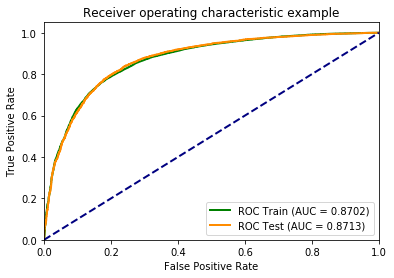

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.3, penalty='l2')
train_test_model(lr, X_train, y_train, X_test, y_test)

#### Estimated coefficients

In [20]:
coef_values = zip(selected_features, lr.coef_.flatten()) # 把係數的名字和數值連結起來
df_coeffs = pd.DataFrame(list(coef_values))
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.sort_values(by='coeff', ascending=False, inplace=True)
df_coeffs

,feature,coeff
15,days_from_last_P_evnet,1.016243e-01
27,eighty_30,5.374377e-04
14,freq_D_last_30,9.243832e-05
19,total_play_time_3,4.903668e-07
22,total_play_time_30,3.030045e-08
21,total_play_time_14,1.677678e-08
10,freq_D_last_1,0.000000e+00
23,eighty_1,0.000000e+00
18,total_play_time_1,0.000000e+00
0,freq_P_last_1,0.000000e+00


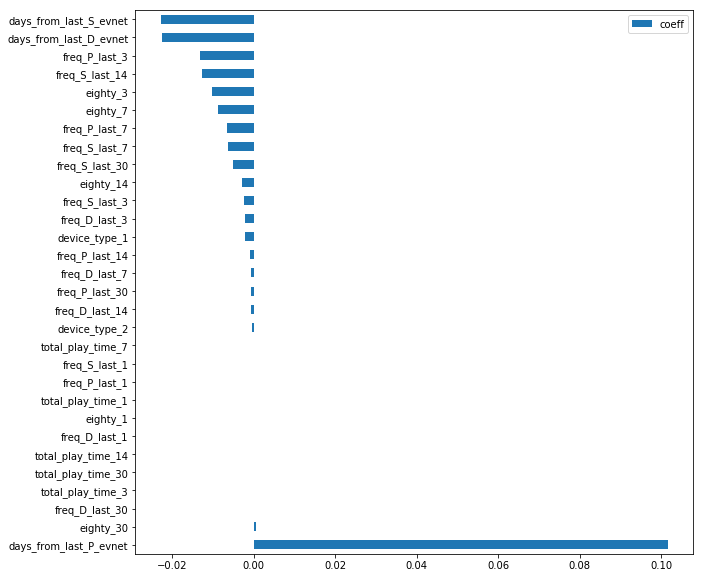

In [21]:
ax = df_coeffs.plot.barh(figsize=(10,10)) # 水平的 bar 圖
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Single Tree

     metrics     train      test
0        AUC  0.898962  0.883753
1   Accuracy  0.821034  0.812500
2  Precision  0.835611  0.835130
3     Recall  0.851507  0.836877
4   f1-score  0.843484  0.836003


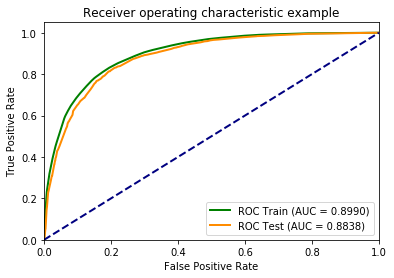

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=20)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
p_train_pred = dt.predict_proba(X_train)[:, 1]

y_test_pred = dt.predict(X_test)
p_test_pred = dt.predict_proba(X_test)[:, 1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

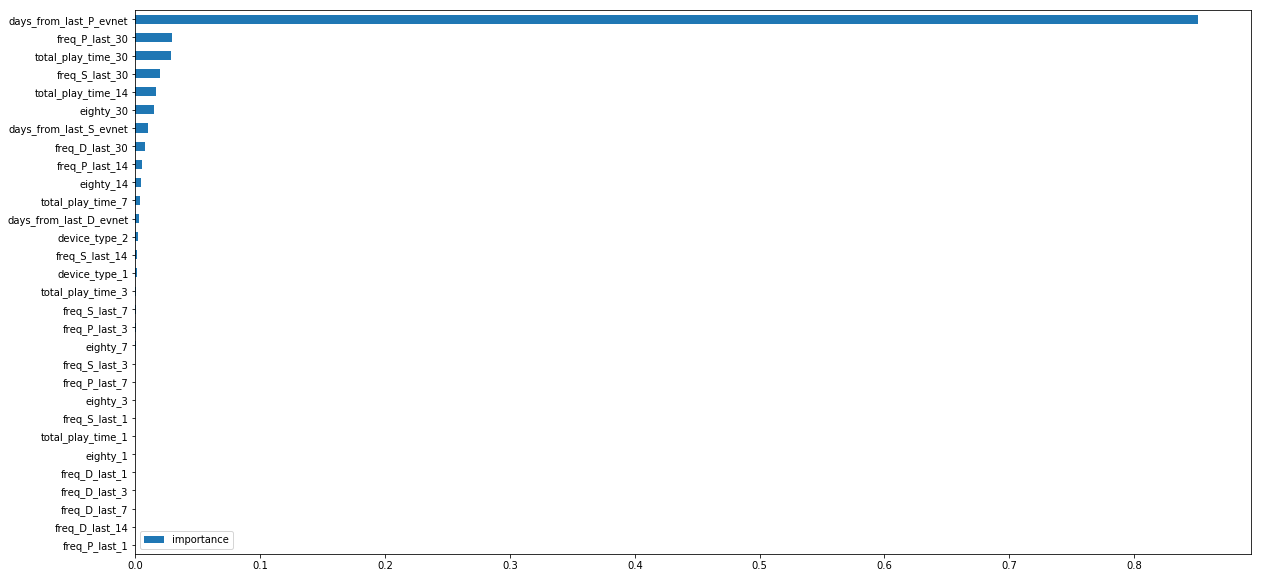

In [23]:
plot_feature_importance(dt)

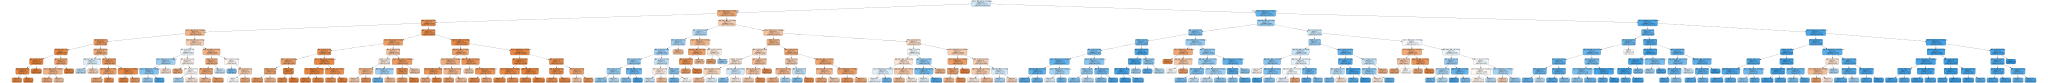

In [24]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=selected_features,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Bagged Trees

     metrics     train      test
0        AUC  0.904709  0.891475
1   Accuracy  0.824492  0.818471
2  Precision  0.837226  0.838347
3     Recall  0.856647  0.845068
4   f1-score  0.846825  0.841694


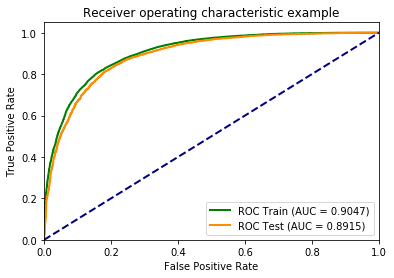

In [25]:
from sklearn.ensemble import BaggingClassifier

parameters = {'base_estimator': dt,
              'n_estimators': 100,
              'n_jobs': -1}

bagged_trees = BaggingClassifier(**parameters)

train_test_model(bagged_trees, X_train, y_train, X_test, y_test)

### Single KNN

     metrics     train      test
0        AUC  0.897200  0.842886
1   Accuracy  0.814391  0.782544
2  Precision  0.832884  0.809765
3     Recall  0.841007  0.809341
4   f1-score  0.836926  0.809553


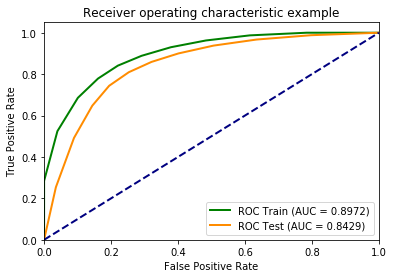

In [26]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':10,
          'leaf_size':100}

knn = KNeighborsClassifier(**params)

train_test_model(knn, X_train, y_train, X_test, y_test)

### Bagged KNN

     metrics     train      test
0        AUC  0.902114  0.848052
1   Accuracy  0.815237  0.785629
2  Precision  0.818069  0.797279
3     Recall  0.866444  0.837574
4   f1-score  0.841562  0.816930


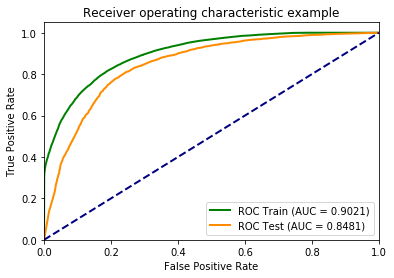

In [27]:
from sklearn.ensemble import BaggingClassifier

params = {'base_estimator': knn,
          'n_estimators':30,
          'n_jobs':-1}

bagged_knn = BaggingClassifier(**params)

train_test_model(bagged_knn, X_train, y_train, X_test, y_test)

### Random Forest

     metrics     train      test
0        AUC  0.901054  0.889150
1   Accuracy  0.826234  0.816182
2  Precision  0.835388  0.832963
3     Recall  0.863281  0.848205
4   f1-score  0.849106  0.840515


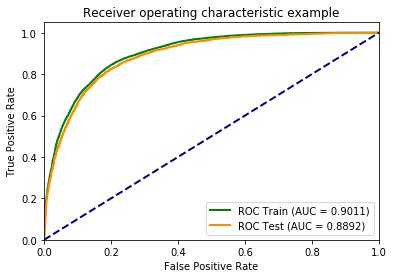

In [28]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 10,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1}
rf = RandomForestClassifier(**parameters)

train_test_model(rf, X_train, y_train, X_test, y_test)

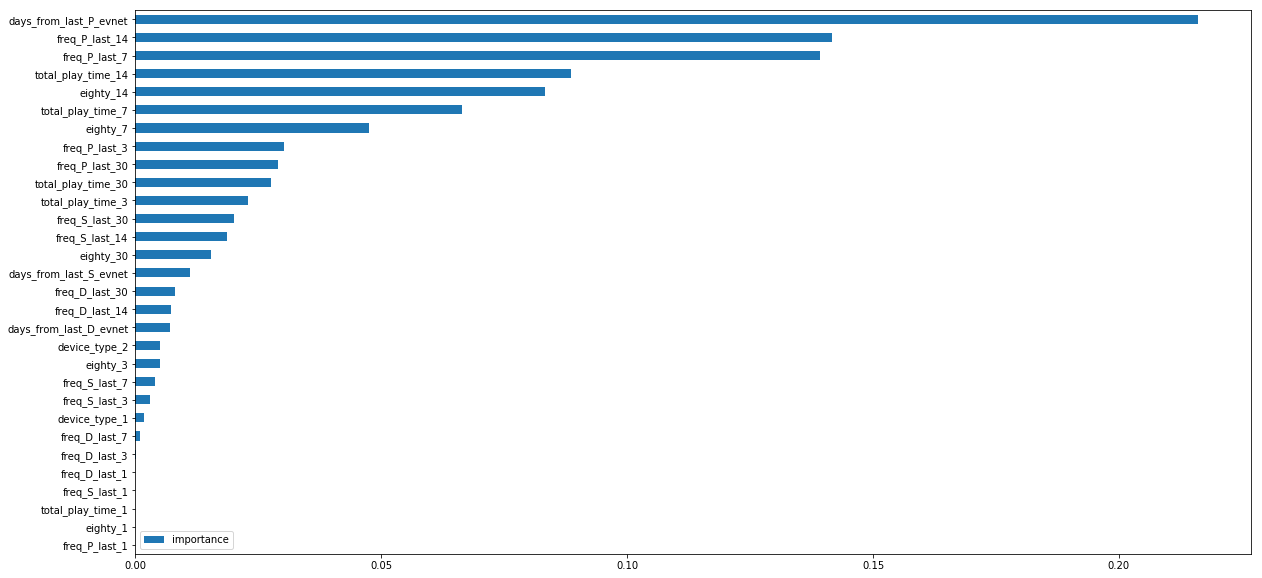

In [29]:
plot_feature_importance(rf)

### Gradient Boosting Trees

     metrics     train      test
0        AUC  0.906146  0.890145
1   Accuracy  0.829568  0.817476
2  Precision  0.836548  0.832425
3     Recall  0.868816  0.851865
4   f1-score  0.852377  0.842033


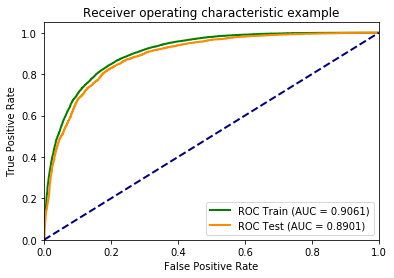

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features': 0.8,
#     'random_state': 42
# }

gbt = GradientBoostingClassifier(**parameters)

train_test_model(gbt, X_train, y_train, X_test, y_test)

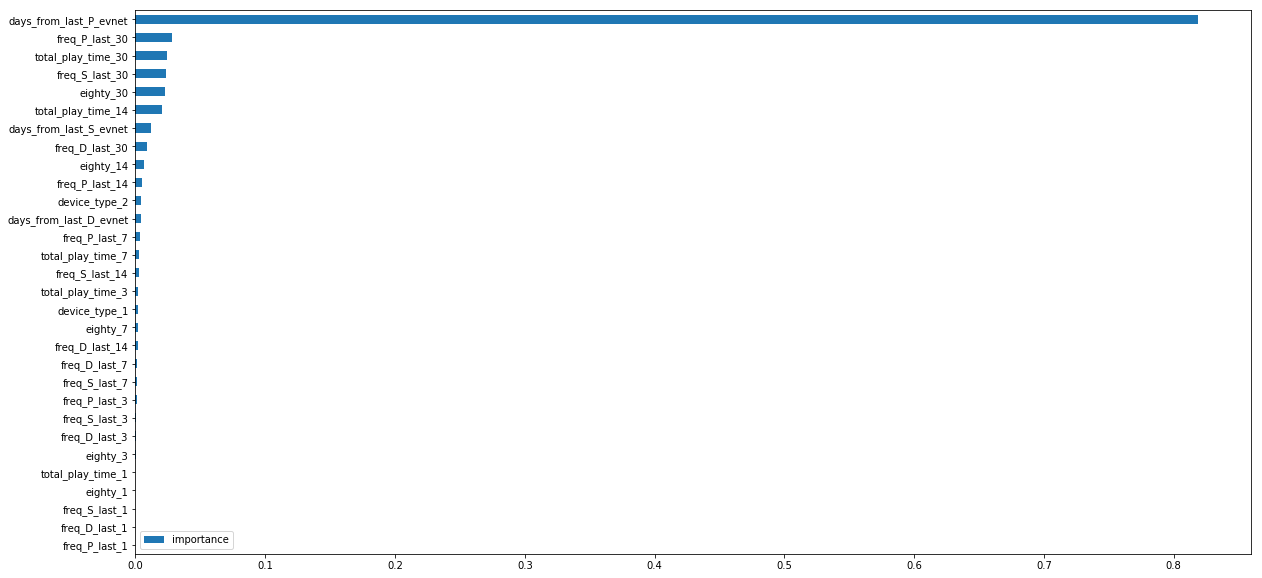

In [31]:
plot_feature_importance(gbt)

### Neural Network

     metrics     train      test
0        AUC  0.816140  0.811310
1   Accuracy  0.770676  0.765227
2  Precision  0.860105  0.859545
3     Recall  0.710658  0.703904
4   f1-score  0.778272  0.773977


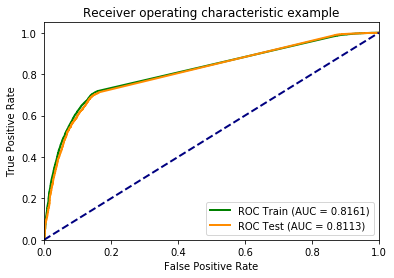

In [32]:
from sklearn.neural_network import MLPClassifier

parameters = {
    'solver': 'adam',
    'activation': 'relu',
    'alpha': 1e-5, # increase alpha --> increase penalty
    'hidden_layer_sizes': (5, 5),
    'learning_rate': 'adaptive',
    'random_state': 1
}

nn = MLPClassifier(**parameters)

train_test_model(nn, X_train, y_train, X_test, y_test)

### Hyperparameter tuning: Grid search

     metrics     train      test
0        AUC  0.950360  0.891139
1   Accuracy  0.889331  0.819467
2  Precision  0.879864  0.837461
3     Recall  0.931816  0.848554
4   f1-score  0.905095  0.842971


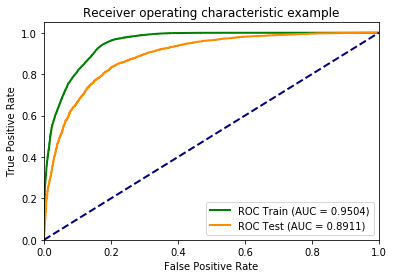

In [33]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'criterion': ['gini'],
    'max_depth': [5, 15, 20, 25],
    'min_samples_split': [2],
    'min_samples_leaf': [2, 5, 10, 20],
    'n_jobs': [-1]
}

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)